<a href="https://colab.research.google.com/github/Noman-494/Deep_learning/blob/main/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
import kagglehub

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")

print("Path to model files:", path)


100%|██████████| 5.08k/5.08k [00:00<00:00, 8.69MB/s]



  0%|          | 0.00/1.25M [00:00<?, ?B/s]



  0%|          | 0.00/6.49M [00:00<?, ?B/s]
100%|██████████| 1.25M/1.25M [00:00<00:00, 2.08MB/s]


 15%|█▌        | 1.00M/6.49M [00:00<00:03, 1.77MB/s]

 31%|███       | 2.00M/6.49M [00:00<00:01, 3.42MB/s]

100%|██████████| 6.49M/6.49M [00:00<00:00, 7.84MB/s]

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2


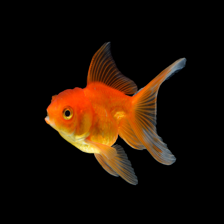

In [14]:
gold_fish = Image.open("/content/Image.jpg").resize((224,224))
gold_fish

In [15]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [16]:
gold_fish[np.newaxis, ...]

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]])

In [17]:
path.predict(gold_fish[np.newaxis, ...])

AttributeError: 'str' object has no attribute 'predict'

In [18]:
import tensorflow as tf
import kagglehub
import numpy as np
from PIL import Image

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")

print("Path to model files:", path)

# Load the model using tensorflow
model = tf.keras.models.load_model(path)

gold_fish = Image.open("/content/Image.jpg").resize((224,224))
gold_fish = np.array(gold_fish)/255.0

# Make prediction
predictions = model.predict(gold_fish[np.newaxis, ...])

print(predictions)

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2


ValueError: File format not supported: filepath=/root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).

In [19]:
import tensorflow as tf
import kagglehub
import numpy as np
from PIL import Image

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")

print("Path to model files:", path)

# Load the model using tf.saved_model.load instead of tf.keras.models.load_model
model = tf.saved_model.load(path)

# Access the prediction function within the loaded SavedModel
infer = model.signatures['serving_default']


gold_fish = Image.open("/content/Image.jpg").resize((224,224))
gold_fish = np.array(gold_fish)/255.0

# Prepare the input for prediction
input_tensor = tf.convert_to_tensor(gold_fish[np.newaxis, ...], dtype=tf.float32)

# Make prediction using the infer function
predictions = infer(input_tensor)

# Extract the prediction results (you might need to adjust this based on your model's output)
# For example, if the output is a dictionary with a key 'predictions', you can access it like this:
# predictions = predictions['predictions'].numpy()

print(predictions)

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2


InvalidArgumentError: Graph execution error:

Detected at node predict/MobilenetV2/Logits/Squeeze defined at (most recent call last):
<stack traces unavailable>
Can not squeeze dim[1], expected a dimension of 1, got 4
	 [[{{node predict/MobilenetV2/Logits/Squeeze}}]] [Op:__inference_signature_wrapper_2266]

In [20]:
import tensorflow as tf
import kagglehub
import numpy as np
from PIL import Image

# Download latest version
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")

print("Path to model files:", path)

# Load the model using tf.saved_model.load instead of tf.keras.models.load_model
model = tf.saved_model.load(path)

# Access the prediction function within the loaded SavedModel
infer = model.signatures['serving_default']

gold_fish = Image.open("/content/Image.jpg").resize((128, 128)) # Resize to 128x128
gold_fish = np.array(gold_fish)/255.0

# Prepare the input for prediction
input_tensor = tf.convert_to_tensor(gold_fish[np.newaxis, ...], dtype=tf.float32)

# Make prediction using the infer function
predictions = infer(input_tensor)

# Extract the prediction results (you might need to adjust this based on your model's output)
# For example, if the output is a dictionary with a key 'predictions', you can access it like this:
# predictions = predictions['predictions'].numpy()

print(predictions)

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2
{'logits': <tf.Tensor: shape=(1, 1001), dtype=float32, numpy=
array([[ 0.58134174,  2.771194  , 11.463415  , ..., -0.33830848,
         2.279772  , -0.8791731 ]], dtype=float32)>}


In [24]:
# prompt: i want to see the predication index number so i check from class label

import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import kagglehub

# Download the model
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")
print("Path to model files:", path)

# Load the model
model = tf.saved_model.load(path)
infer = model.signatures['serving_default']

# Load and preprocess the image
gold_fish = Image.open("/content/Image.jpg").resize((128, 128))
gold_fish = np.array(gold_fish) / 255.0
input_tensor = tf.convert_to_tensor(gold_fish[np.newaxis, ...], dtype=tf.float32)

# Make predictions
predictions = infer(input_tensor)

# Get the predicted class index
predicted_class_index = np.argmax(predictions['predictions'].numpy())

print(f"Predicted class index: {predicted_class_index}")

# (Optional)  If you have the class labels available:
# Load class labels (replace 'imagenet_labels.txt' with your actual labels file)
# with open('imagenet_labels.txt', 'r') as f:
#     labels = [line.strip() for line in f]

# print(f"Predicted class: {labels[predicted_class_index]}")

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2


KeyError: 'predictions'

In [25]:
# prompt: i want to see the predication index number so i check from class label

import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import kagglehub

# Download the model
path = kagglehub.model_download("google/mobilenet-v2/tensorFlow2/035-128-classification")
print("Path to model files:", path)

# Load the model
model = tf.saved_model.load(path)
infer = model.signatures['serving_default']

# Load and preprocess the image
gold_fish = Image.open("/content/Image.jpg").resize((128, 128))
gold_fish = np.array(gold_fish) / 255.0
input_tensor = tf.convert_to_tensor(gold_fish[np.newaxis, ...], dtype=tf.float32)

# Make predictions
predictions = infer(input_tensor)

# Get the predicted class index
# Access the 'logits' key instead of 'predictions'
predicted_class_index = np.argmax(predictions['logits'].numpy())

print(f"Predicted class index: {predicted_class_index}")

# (Optional)  If you have the class labels available:
# Load class labels (replace 'imagenet_labels.txt' with your actual labels file)
# with open('imagenet_labels.txt', 'r') as f:
#     labels = [line.strip() for line in f]

# print(f"Predicted class: {labels[predicted_class_index]}")

Path to model files: /root/.cache/kagglehub/models/google/mobilenet-v2/tensorFlow2/035-128-classification/2
Predicted class index: 2


In [26]:

!wget https://th.bing.com/th/id/OIP.glMe34Jy7nYlf4brL8Nb9gHaHa?rs=1&pid=ImgDetMain -O /content/Image.jpg

/bin/bash: line 1: -O: command not found
--2024-11-20 06:28:28--  https://th.bing.com/th/id/OIP.glMe34Jy7nYlf4brL8Nb9gHaHa?rs=1
Resolving th.bing.com (th.bing.com)... 2.16.27.215, 2.16.27.225, 2a02:26f0:fe00::213:c250, ...
Connecting to th.bing.com (th.bing.com)|2.16.27.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29593 (29K) [image/jpeg]
Saving to: ‘OIP.glMe34Jy7nYlf4brL8Nb9gHaHa?rs=1’

OIP.glMe34Jy7nYlf4b 100%[===================>]  28.90K  --.-KB/s    in 0.004s  

2024-11-20 06:28:28 (7.68 MB/s) - ‘OIP.glMe34Jy7nYlf4brL8Nb9gHaHa?rs=1’ saved [29593/29593]



In [27]:
shark = Image.open("/content/OIP.glMe34Jy7nYlf4brL8Nb9gHaHa?rs=1").resize((128, 128))
shark = np.array(shark) / 255.0
input_tensor = tf.convert_to_tensor(shark[np.newaxis, ...], dtype=tf.float32)

# Make predictions
predictions = infer(input_tensor)

# Get the predicted class index
# Access the 'logits' key instead of 'predictions'
predicted_class_index = np.argmax(predictions['logits'].numpy())

print(f"Predicted class index: {predicted_class_index}")

# (Optional)  If you have the class labels available:
# Load class labels (replace 'imagenet_labels.txt' with your actual labels file)
# with open('imagenet_labels.txt', 'r') as f:
#     labels = [line.strip() for line in f]

# print(f"Predicted class: {labels[predicted_class_index]}")

Predicted class index: 3


In [30]:
shark = Image.open("/content/Image.jpg").resize((128, 128))
shark = np.array(shark) / 255.0
input_tensor = tf.convert_to_tensor(shark[np.newaxis, ...], dtype=tf.float32)

# Make predictions
predictions = infer(input_tensor)

# Get the predicted class index
# Access the 'logits' key instead of 'predictions'
predicted_class_index = np.argmax(predictions['logits'].numpy())

print(f"Predicted class index: {predicted_class_index}")

# (Optional)  If you have the class labels available:
# Load class labels (replace 'imagenet_labels.txt' with your actual labels file)
# with open('imagenet_labels.txt', 'r') as f:
#     labels = [line.strip() for line in f]

# print(f"Predicted class: {labels[predicted_class_index]}")

Predicted class index: 21


In [28]:
!wgethttps://www.bing.com/images/search?view=detailV2&ccid=%2f3P14nTf&id=4CC56103DC06565FD557C8D37EE0398473268C3B&thid=OIP._3P14nTf7LF3flUkXZNLwQHaFj&mediaurl=https%3a%2f%2fi.ytimg.com%2fvi%2fRSxIdENGDr8%2fhqdefault.jpg&cdnurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.ff73f5e274dfecb1777e55245d934bc1%3frik%3dO4wmc4Q54H7TyA%26pid%3dImgRaw%26r%3d0%26sres%3d1%26sresct%3d1%26srh%3d799%26srw%3d1066&exph=360&expw=480&q=water+ouzel+bird&simid=608033435800575756&FORM=IRPRST&ck=0DB3A640E3E3F14767FD98FFE54B6BB7&selectedIndex=1&itb=0

/bin/bash: line 1: wgethttps://www.bing.com/images/search?view=detailV2: No such file or directory


In [29]:

!wget "https://th.bingcom/th/id/R.ff73f5e274dfecb1777e55245d934bc1?rik=O4wmc4Q54H7TyA&pid=ImgRaw&r=0" -O /content/Image.jpg

--2024-11-20 06:33:43--  https://th.bing.com/th/id/R.ff73f5e274dfecb1777e55245d934bc1?rik=O4wmc4Q54H7TyA&pid=ImgRaw&r=0
Resolving th.bing.com (th.bing.com)... 2.16.27.215, 2.16.27.225, 2a02:26f0:fe00::213:c27b, ...
Connecting to th.bing.com (th.bing.com)|2.16.27.215|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29867 (29K) [image/jpeg]
Saving to: ‘/content/Image.jpg’

/content/Image.jpg  100%[===================>]  29.17K  --.-KB/s    in 0.004s  

2024-11-20 06:33:44 (7.19 MB/s) - ‘/content/Image.jpg’ saved [29867/29867]

